In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scipy.cluster.hierarchy as shc 
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

C:\Users\kater\AppData\Local\Temp\ipykernel_2144\275821696.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
## load the data
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df = df.drop(columns=['Email No.'])

In [6]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [7]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [8]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


c:\Users\kater\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [10]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9632850241545894
[[698  18]
 [ 20 299]]


In [11]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [12]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [13]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [14]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       716
           1       0.88      0.95      0.92       319

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



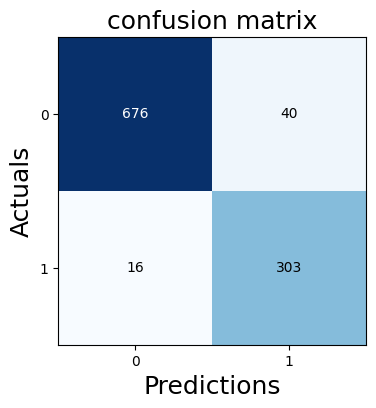

In [15]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()


AUC: 0.946989


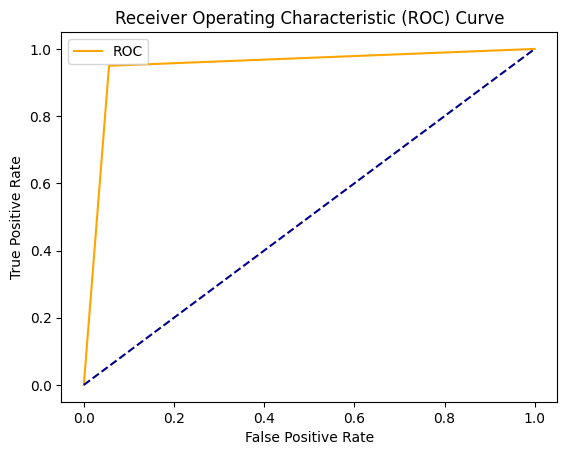

In [16]:

auc_mod2 = roc_auc_score(y_test, y_pred_NB)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
## 0 and 1
#0.5 ----randomely guessing
#less than 0.5 poor model and you need to go back and try several other models
#1--- indicating that your model is able to predict positive and negative classess perfectly

In [18]:
## Hierarical Clustering

## load the data set
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
data_norm =  normalize(data)
data_norm= pd.DataFrame(data_norm, columns= data.columns)
data_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [20]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


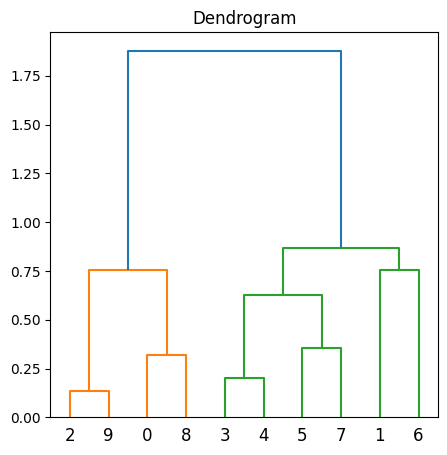

In [21]:
## plot the dendroram, what clusster should be using, how many to use
subset_data = data_norm.sample(n=10)
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.show()

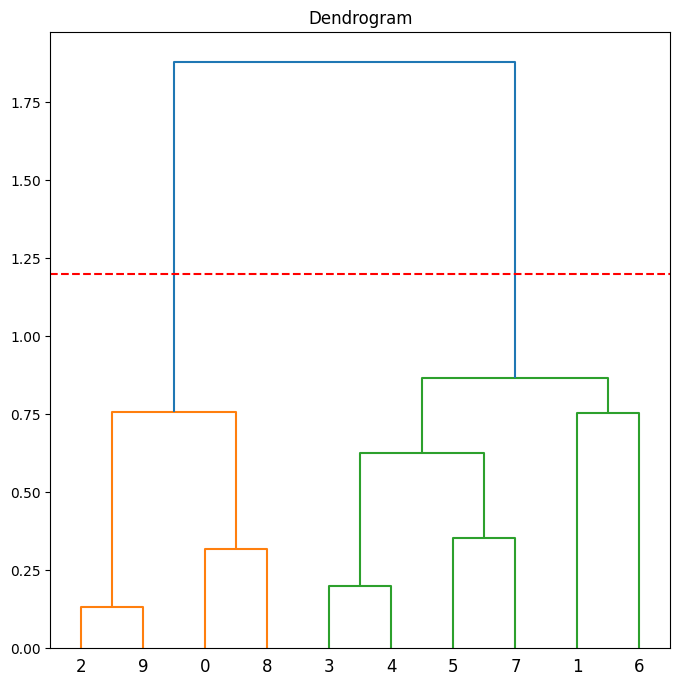

In [22]:
## break
plt.figure(figsize=(8,8))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.axhline(y =1.2, color = 'r', linestyle='--')


In [23]:
## PCA, dimensionality reduction using PCA
pca= PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

In [25]:
## train model

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
now = cluster.fit_predict(reduced_data)

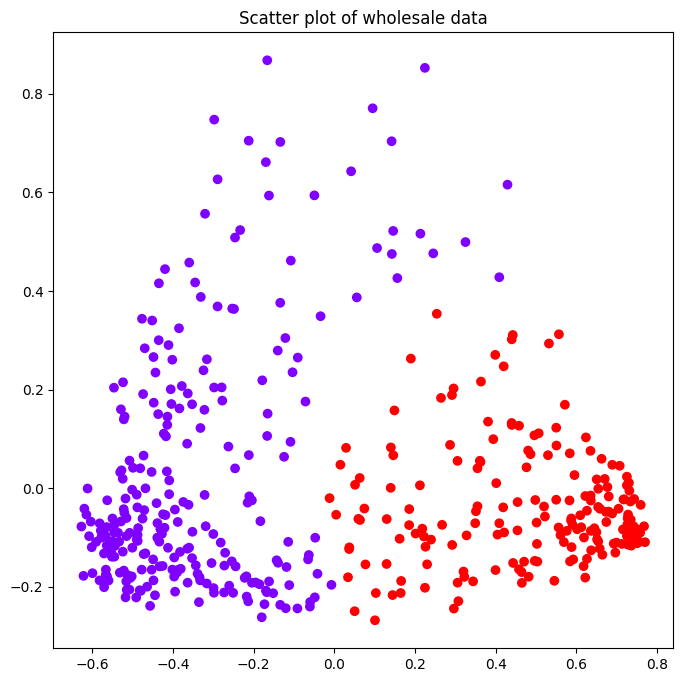

In [26]:
## visualise our cluster

plt.figure(figsize=(8,8))
plt.title('Scatter plot of wholesale data')
plt.scatter(x=reduced_data[:,0], y = reduced_data[:,1], c=cluster.labels_, cmap ='rainbow')


In [28]:
cluster1= AgglomerativeClustering(n_clusters=2, linkage='ward')
now1= cluster.fit_predict(data_norm)

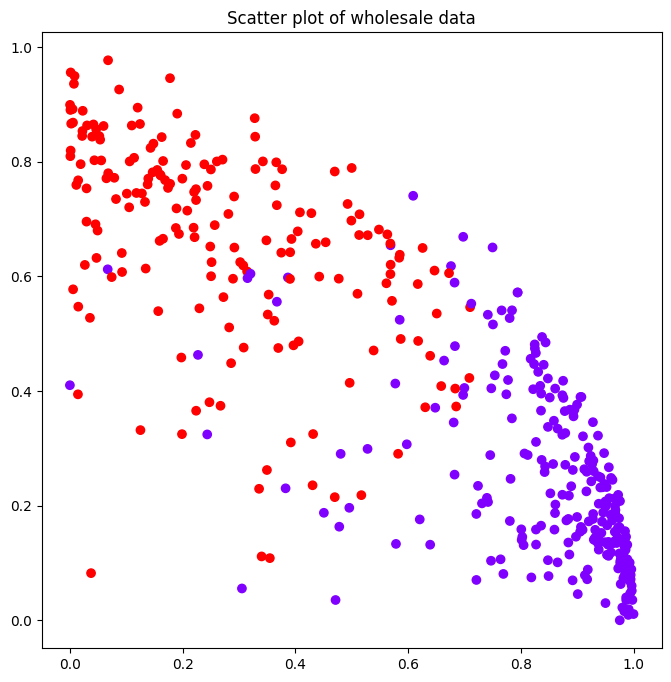

In [30]:

plt.figure(figsize=(8,8))
plt.title('Scatter plot of wholesale data')
plt.scatter(x=data_norm['Fresh'], y = data_norm['Grocery'], c=cluster.labels_, cmap ='rainbow')

In [33]:
df =pd.DataFrame({'reduced_cluster': now,'data_norm_cluster': now1})


In [34]:
df

,reduced_cluster,data_norm_cluster
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
435,0,0
436,0,0
437,1,1
438,0,0
